# Peetz Post-Process
## Cleaned data import, further classification, and results presentation

In [1]:
import sys, os
import pickle
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [2]:
# path='/projects/jasi4471/peetz/Batch_Jobs_V3'

# with open('./Batch_Jobs_V3/post_QC_data_ID60_V3.pkl', "rb") as fh:
#     post_QC_data_ID60 = pickle.load(fh)

# with open('./Batch_Jobs_V3/post_QC_data_ID61_V3.pkl', "rb") as fh:
#     post_QC_data_ID61 = pickle.load(fh)
    
# with open('./Batch_Jobs_V3/post_QC_data_ID68_V3.pkl', "rb") as fh:
#     post_QC_data_ID68 = pickle.load(fh)
    
# with open('./Batch_Jobs_V3/post_QC_data_ID72_V3.pkl', "rb") as fh:
#     post_QC_data_ID72 = pickle.load(fh)
    
# with open('./Batch_Jobs_V3/post_QC_data_ID78_V3.pkl', "rb") as fh:
#     post_QC_data_ID78 = pickle.load(fh)
    
# with open('./Batch_Jobs_V3/post_QC_data_ID82_V3.pkl', "rb") as fh:
#     post_QC_data_ID82 = pickle.load(fh)
    
# with open('./Batch_Jobs_V3/post_QC_data_ID83_V3.pkl', "rb") as fh:
#     post_QC_data_ID83 = pickle.load(fh)
    
# with open('./Batch_Jobs_V3/post_QC_data_ID84_V3.pkl', "rb") as fh:
#     post_QC_data_ID84 = pickle.load(fh)
    
# with open('./Batch_Jobs_V3/post_QC_data_ID85_V3.pkl', "rb") as fh:
#     post_QC_data_ID85 = pickle.load(fh)
    
# with open('./Batch_Jobs_V3/post_QC_data_ID86_V3.pkl', "rb") as fh:
#     post_QC_data_ID86 = pickle.load(fh)
    
# with open('./Batch_Jobs_V3/post_QC_data_ID87_V3.pkl', "rb") as fh:
#     post_QC_data_ID87 = pickle.load(fh)
    
# with open('./Batch_Jobs_V3/post_QC_data_ID88_V3.pkl', "rb") as fh:
#     post_QC_data_ID88 = pickle.load(fh)
    
# with open('./Batch_Jobs_V3/post_QC_data_ID89_V3.pkl', "rb") as fh:
#     post_QC_data_ID89 = pickle.load(fh)
    
# post_QC_data_ID89.keys()

In [3]:
# post_QC_data_v19 = {}

# all_IDs = [post_QC_data_ID60,post_QC_data_ID61,post_QC_data_ID68,post_QC_data_ID72,
#            post_QC_data_ID78,post_QC_data_ID82,post_QC_data_ID83,post_QC_data_ID84,
#            post_QC_data_ID85,post_QC_data_ID86,post_QC_data_ID87,post_QC_data_ID88,
#            post_QC_data_ID89]

# all_keys = post_QC_data_ID60.keys()

# for key in all_keys:
#     df = all_IDs[0][key].copy()

#     all_types = type(post_QC_data_ID60[key])

#     if all_types == pd.core.frame.DataFrame:
#         df = all_IDs[0][key].copy()
#         for i in range(1,13):
#             df = pd.concat((df,all_IDs[i][key].copy()), axis=1)

#     else:
#         df = all_IDs[0][key].copy()
#         for i in range(1,13):
#             df = df+all_IDs[i][key].copy()

#     post_QC_data_v19[key]=df.copy()

# post_QC_data_v19

# output = open('./post_QC_data_v19.pkl', 'wb')
# pickle.dump(post_QC_data_v19, output)
# output.close()

In [10]:
path='/projects/jasi4471/peetz/'

with open(path + './post_QC_data_v19.pkl', "rb") as fh:
    post_QC_data = pickle.load(fh)
    
post_QC_data.keys()

dict_keys(['AWS_Vr_mat', 'WD_Vr_mat', 'CL_Vr_mat', 'WW_Vr_mat', 'AWS_Va_mat', 'WD_Va_mat', 'CL_Va_mat', 'WW_Va_mat', 'nrange2', 'ws_WC_80m', 'wd_WC_80m', 'ws_60m', 'wd_60m', 'yaw_offset_mean_list', 'yaw_offset_std_list', 'yaw_vane_mean_list', 'yaw_vane_std_list', 'scan_midtime_list', 'TI_60m_list', 'Obukhov_length_10m_list', 'RMSE_Vr_mat', 'RMSE_Va_mat', 'Dif_Vr_mat', 'Dif_Va_mat', 'Dif_max_Vr_list', 'Dif_max_Va_list', 'Steering_status_list'])

## 1-D (time-history) data

In [11]:
stats = pd.DataFrame({
    'Diff Max': post_QC_data['Dif_max_Va_list'],
})
stats.index.name = 'time'

conditions = pd.DataFrame({
    'ws_WC_80m': post_QC_data['ws_WC_80m'],
    'wd_WC_80m': post_QC_data['wd_WC_80m'],
    'ws_60m': post_QC_data['ws_60m'],
    'wd_60m': post_QC_data['wd_60m'],
    'yaw_offset_mean_target': post_QC_data['yaw_offset_mean_list'],
    'yaw_offset_std_target': post_QC_data['yaw_offset_std_list'],
    'yaw_vane_mean': post_QC_data['yaw_vane_mean_list'],
    'yaw_vane_std': post_QC_data['yaw_vane_std_list'],
    'steering_status': post_QC_data['Steering_status_list'],
    'TI_60m': post_QC_data['TI_60m_list'],
    'Obukhov_length_10m':post_QC_data['Obukhov_length_10m_list']
})
conditions.index.name = 'time'

## 2-D (time/range history) data

In [12]:
indices = [np.arange(N) for N in post_QC_data['WD_Va_mat'].T.shape]
multiidx = pd.MultiIndex.from_product(indices, names=['time','range'])

wake_Vr = pd.DataFrame({
    'WD': post_QC_data['WD_Vr_mat'].values.T.flatten(),
    'WW': post_QC_data['WW_Vr_mat'].values.T.flatten(),
    'AWS': post_QC_data['AWS_Vr_mat'].values.T.flatten(),
    'CL': post_QC_data['CL_Vr_mat'].values.T.flatten(),
    'RMSE_Vr': post_QC_data['RMSE_Vr_mat'].values.T.flatten(),
    'Dif_Vr': post_QC_data['Dif_Vr_mat'].values.T.flatten(),
}, index=multiidx)

wake_Va = pd.DataFrame({
    'WD': post_QC_data['WD_Va_mat'].values.T.flatten(),
    'WW': post_QC_data['WW_Va_mat'].values.T.flatten(),
    'AWS': post_QC_data['AWS_Va_mat'].values.T.flatten(),
    'CL': post_QC_data['CL_Va_mat'].values.T.flatten(),
    'RMSE_Va': post_QC_data['RMSE_Va_mat'].values.T.flatten(),
    'Dif_Va': post_QC_data['Dif_Va_mat'].values.T.flatten(),
}, index=multiidx)

# multiindex (long format)
wake_Va=wake_Va.replace(pd.NA, np.nan)
wake_Vr=wake_Vr.replace(pd.NA, np.nan)

# wide format
wake_Va['WD'].unstack()
wake_Vr['WD'].unstack()

wake_Va['WW']=wake_Va['WW']*4
wake_Vr['WW']=wake_Vr['WW']*4

In [16]:
wake_Vr

WD          WW        AWS          CL       RMSE_Vr  \
time  range                                                              
0     0      1.385008  104.409734  16.894707 -142.986762  7.810855e-27   
      1           NaN         NaN        NaN         NaN  5.499818e-26   
      2           NaN         NaN        NaN         NaN  8.411451e-27   
      3           NaN         NaN        NaN         NaN  5.014257e-32   
      4           NaN         NaN        NaN         NaN  4.239118e-33   
...               ...         ...        ...         ...           ...   
85717 7           NaN         NaN        NaN         NaN           NaN   
      8           NaN         NaN        NaN         NaN           NaN   
      9           NaN         NaN        NaN         NaN           NaN   
      10          NaN         NaN        NaN         NaN           NaN   
      11          NaN         NaN        NaN         NaN           NaN   

               Dif_Vr  
time  range            
0     0      0.300313  
      1      0.000334  
      2      0.000023  
      3      0.000039  
      4      0.000627  
...               ...  
85717 7           NaN  
      8           NaN  
      9           NaN  
      10          NaN  
      11          NaN  

[1028616 rows x 6 columns]

## Apply QC with index, now the index has both the time and range

In [6]:
wake_Va=wake_Va.loc[(wake_Va.WW > 50) | (wake_Va.WW < 200)]
wake_Vr=wake_Vr.loc[(wake_Vr.WW > 50) | (wake_Vr.WW < 200)]

idx = wake_Va.index.get_level_values('time')
wake_Va['Diff Max'] = stats['Diff Max'].loc[idx].values
idx = wake_Vr.index.get_level_values('time')
wake_Vr['Diff Max'] = stats['Diff Max'].loc[idx].values

idx = wake_Va.index.get_level_values('time')
wake_Va['ws_WC_80m'] = conditions['ws_WC_80m'].loc[idx].values
wake_Va['ws_60m'] = conditions['ws_60m'].loc[idx].values
wake_Va['wd_WC_80m'] = conditions['wd_WC_80m'].loc[idx].values
wake_Va['wd_60m'] = conditions['wd_60m'].loc[idx].values
wake_Va['yaw_offset_mean_target'] = conditions['yaw_offset_mean_target'].loc[idx].values
wake_Va['yaw_offset_std_target'] = conditions['yaw_offset_std_target'].loc[idx].values
wake_Va['yaw_vane_mean'] = conditions['yaw_vane_mean'].loc[idx].values
wake_Va['yaw_vane_std'] = conditions['yaw_vane_std'].loc[idx].values
wake_Va['steering_status'] = conditions['steering_status'].loc[idx].values
wake_Va['Obukhov_length_10m'] = conditions['Obukhov_length_10m'].loc[idx].values
wake_Va['TI_60m'] = conditions['TI_60m'].loc[idx].values

idx = wake_Vr.index.get_level_values('time')
wake_Vr['ws_WC_80m'] = conditions['ws_WC_80m'].loc[idx].values
wake_Vr['ws_60m'] = conditions['ws_60m'].loc[idx].values
wake_Vr['wd_WC_80m'] = conditions['wd_WC_80m'].loc[idx].values
wake_Vr['wd_60m'] = conditions['wd_60m'].loc[idx].values
wake_Vr['yaw_offset_mean_target'] = conditions['yaw_offset_mean_target'].loc[idx].values
wake_Vr['yaw_offset_std_target'] = conditions['yaw_offset_std_target'].loc[idx].values
wake_Vr['yaw_vane_mean'] = conditions['yaw_vane_mean'].loc[idx].values
wake_Vr['yaw_vane_std'] = conditions['yaw_vane_std'].loc[idx].values
wake_Vr['steering_status'] = conditions['steering_status'].loc[idx].values
wake_Vr['Obukhov_length_10m'] = conditions['Obukhov_length_10m'].loc[idx].values
wake_Vr['TI_60m'] = conditions['TI_60m'].loc[idx].values

wake_Va['WD']=wake_Va['WD']/wake_Va['ws_WC_80m']*100
wake_Vr['WD']=wake_Vr['WD']/wake_Vr['ws_WC_80m']*100
wake_Va['WW']=wake_Va['WW']/77
wake_Vr['WW']=wake_Vr['WW']/77

## Curve fit error distribution

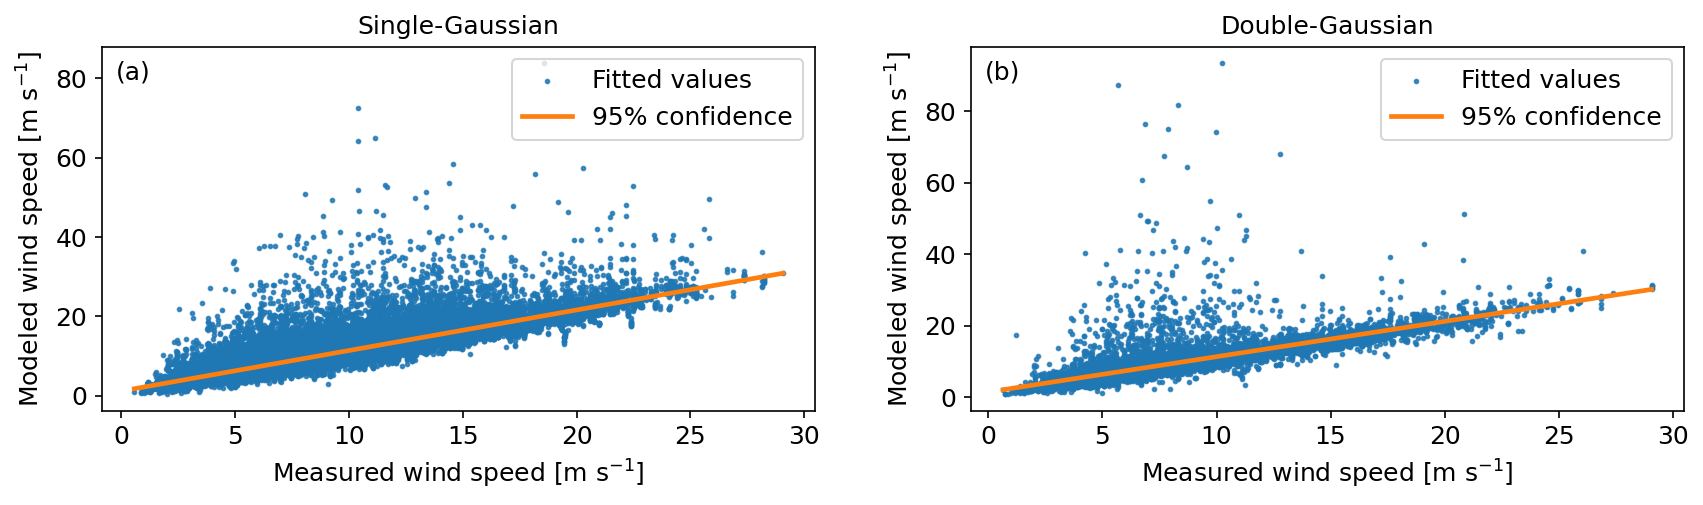

In [127]:
fig=plt.figure(figsize=(12,4), dpi=150)

ax=fig.add_subplot(121)
sns.regplot(x='ws_WC_80m', y='AWS', data=wake_Vr, ci=95, order=1, marker='.', scatter_kws={"color":"C0","s":12}, line_kws={"color":"C1","label":"95% confidence"}, label='Fitted values')
plt.title("Single-Gaussian",fontsize=12)
plt.xlabel('Measured wind speed [m s$^{-1}$]',fontsize=12)
plt.ylabel('Modeled wind speed [m s$^{-1}$]',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best',fontsize=12)
plt.text(.02,.91, '(a)',fontsize=12, transform=ax.transAxes)

ax=fig.add_subplot(122)
sns.regplot(x='ws_WC_80m', y='AWS', data=wake_Va, ci=95, order=1, marker='.', scatter_kws={"color":"C0","s":12}, line_kws={"color":"C1","label":"95% confidence"}, label='Fitted values')
plt.title("Double-Gaussian",fontsize=12)
plt.xlabel('Measured wind speed [m s$^{-1}$]',fontsize=12)
plt.ylabel('Modeled wind speed [m s$^{-1}$]',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best',fontsize=12)
plt.text(.02,.91, '(b)',fontsize=12, transform=ax.transAxes)

# ax=fig.add_subplot(223)
# plt.hist(wake_Vr.RMSE_Vr,150, color="C0", label="F-statistic")
# # plt.axvline(x=np.percentile(wake_Vr.RMSE_Vr, 95), color='C1', label=f'95th percentile: {np.round(np.percentile(wake_Vr.RMSE_Vr, 95), 2)}')
# plt.legend(loc='best',fontsize=12)
# plt.xlim(0, 0.000000001)
# # plt.ylim(0, 10000)
# plt.title("Single-Gaussian",fontsize=12)
# # plt.xlabel('Root-mean-square error [m s$^{-1}$]',fontsize=12)
# plt.xlabel('P-Value',fontsize=12)
# plt.ylabel('Count',fontsize=12)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.text(.02,.91, '(c)',fontsize=12, transform=ax.transAxes)

# ax=fig.add_subplot(224)
# plt.plot(wake_Va.RMSE_Va, wake_Va.RMSE_Va, color="C0", label="F-statistic")
# # plt.axvline(x=np.percentile(wake_Va.RMSE_Va, 95), color='C1', label=f'95th percentile: {np.round(np.percentile(wake_Va.RMSE_Va, 95), 2)}')
# plt.legend(loc='best',fontsize=12)
# # plt.xlim(-0.1, 2.75)
# # plt.ylim(0, 10000)
# plt.title("Double-Gaussian",fontsize=12)
# # plt.xlabel('Root-mean-square error [m s$^{-1}$]',fontsize=12)
# plt.xlabel('P-Value',fontsize=12)
# plt.ylabel('Count',fontsize=12)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.text(.02,.91, '(d)',fontsize=12, transform=ax.transAxes)

fig.tight_layout(pad=3)

file_name = path + '/Figures_Final_V1/curve_fit_error.pdf'
plt.savefig(file_name, bbox_inches='tight', format='pdf')

In [9]:
wake_Vr

WD        WW        AWS          CL       RMSE_Vr  \
time  range                                                             
0     0       9.097885  1.355971  16.894707 -142.986762  7.810855e-27   
1     0      23.147713  1.960695  15.945194  -20.556517  3.264834e-35   
      1      18.214793  1.982587  15.544259  -23.449676  6.598192e-33   
      2      15.505965  2.241935  15.583882  -24.321098  2.384209e-32   
      3      15.835907  2.042048  15.525960  -30.787927  8.809826e-33   
...                ...       ...        ...         ...           ...   
85643 1            NaN  1.344907  14.724008   -6.803945  4.494931e-15   
      2            NaN  2.516609  22.295400  -21.639184  9.291768e-17   
85654 0            NaN  1.367493  15.181007   -8.265174  1.161601e-24   
85669 0            NaN  2.182589  41.364180  -24.913087  5.984066e-11   
85670 0            NaN  1.379178  16.437512   -7.105102  2.223731e-13   

               Dif_Vr  Diff Max  ws_WC_80m     ws_60m   wd_WC_80m      wd_60m  \
time  range                                                                     
0     0      0.300313  2.924319  15.223402  14.416003  324.189485  326.640333   
1     0      0.181494  3.464402  15.223402  14.416003  324.189485  326.640333   
      1      0.531097  3.464402  15.223402  14.416003  324.189485  326.640333   
      2      0.277689  3.464402  15.223402  14.416003  324.189485  326.640333   
      3      0.263235  3.464402  15.223402  14.416003  324.189485  326.640333   
...               ...       ...        ...        ...         ...         ...   
85643 1      0.023134  0.907905        NaN        NaN         NaN         NaN   
      2      0.267868  0.907905        NaN        NaN         NaN         NaN   
85654 0      0.069877  2.106540        NaN        NaN         NaN         NaN   
85669 0      0.196615       NaN        NaN        NaN         NaN         NaN   
85670 0      0.985258       NaN        NaN        NaN         NaN         NaN   

             yaw_offset_mean_target  yaw_offset_std_target  yaw_vane_mean  \
time  range                                                                 
0     0                         NaN                    NaN            NaN   
1     0                         NaN                    NaN            NaN   
      1                         NaN                    NaN            NaN   
      2                         NaN                    NaN            NaN   
      3                         NaN                    NaN            NaN   
...                             ...                    ...            ...   
85643 1               9.881313e-324                    NaN       1.227675   
      2               9.881313e-324                    NaN       1.227675   
85654 0               9.881313e-324                    NaN       1.227675   
85669 0               9.881313e-324                    NaN       1.227675   
85670 0               9.881313e-324                    NaN       1.227675   

             yaw_vane_std  steering_status  Obukhov_length_10m     TI_60m  
time  range                                                                
0     0               NaN              NaN           75.486098  12.572836  
1     0               NaN              NaN           75.486098  12.572836  
      1               NaN              NaN           75.486098  12.572836  
      2               NaN              NaN           75.486098  12.572836  
      3               NaN              NaN           75.486098  12.572836  
...                   ...              ...                 ...        ...  
85643 1               NaN              0.0          389.551932        NaN  
      2               NaN              0.0          389.551932        NaN  
85654 0               NaN              0.0          389.551932        NaN  
85669 0               NaN              1.0          389.551932        NaN  
85670 0               NaN              1.0          389.551932        NaN  

[92649 rows x 18 columns]

In [129]:
wake_Vr.RMSE_Vr.mean()

1.826798321564067e-08

## Add other columns and then apply QC needed

In [163]:
a_rmse_Va=np.percentile(wake_Va.RMSE_Va,95)
a_rmse_Vr=np.percentile(wake_Vr.RMSE_Vr,95)

wake_Va=wake_Va.loc[(wake_Va['wd_WC_80m'] > 280)  | (wake_Va['wd_WC_80m'] < 60)]
wake_Vr=wake_Vr.loc[(wake_Vr['wd_WC_80m'] > 280)  | (wake_Vr['wd_WC_80m'] < 60)]

wake_Va['AWS_diff']= np.abs(wake_Va['ws_WC_80m']-wake_Va['AWS'])/wake_Va['ws_WC_80m']*100
wake_Vr['AWS_diff']= np.abs(wake_Vr['ws_WC_80m']-wake_Vr['AWS'])/wake_Vr['ws_WC_80m']*100
wake_Va=wake_Va.loc[(wake_Va['AWS_diff'] < 25) ]
wake_Vr=wake_Vr.loc[(wake_Vr['AWS_diff'] < 25) ]

wake_Va=wake_Va.loc[(wake_Va['RMSE_Va'] < a_rmse_Va) ]
wake_Vr=wake_Vr.loc[(wake_Vr['RMSE_Vr'] < a_rmse_Vr) ]

n=len(wake_Va['WD'].unstack().mean())
WD_Va_mean=wake_Va['WD'].unstack().mean()
WD_Va_std=wake_Va['WD'].unstack().std()
WD_Va_median=wake_Va['WD'].unstack().median()

n=len(wake_Vr['WD'].unstack().mean())
WD_Vr_mean=wake_Vr['WD'].unstack().mean()
WD_Vr_std=wake_Vr['WD'].unstack().std()
WD_Vr_median=wake_Vr['WD'].unstack().median()

WW_Va_mean=wake_Va['WW'].unstack().mean()
WW_Va_std=wake_Va['WW'].unstack().std()
WW_Va_median=wake_Va['WW'].unstack().median()

WW_Vr_mean=wake_Vr['WW'].unstack().mean()
WW_Vr_std=wake_Vr['WW'].unstack().std()
WW_Vr_median=wake_Vr['WW'].unstack().median()

CL_Va_mean=wake_Va['CL'].unstack().mean()
CL_Va_std=wake_Va['CL'].unstack().std()
CL_Va_median=wake_Va['CL'].unstack().median()

CL_Vr_mean=wake_Vr['CL'].unstack().mean()
CL_Vr_std=wake_Vr['CL'].unstack().std()
CL_Vr_median=wake_Vr['CL'].unstack().median()

nrange2 = post_QC_data['nrange2']
rotor_diameter = 77
Rd = np.array([x/(-77) for x in nrange2])

D=77.
n=int(12)

wake_Va['zL']=10/wake_Va.Obukhov_length_10m
index=(wake_Va['zL'] < -2) | (wake_Va['zL'] > 2)
wake_Va.zL[index]=np.nan

wake_Vr['zL']=10/wake_Vr.Obukhov_length_10m
index=(wake_Vr['zL'] < -2) | (wake_Vr['zL'] > 2)
wake_Vr.zL[index]=np.nan

label_sidechain = WD_Va_mean*np.nan

In [164]:
wake_Vr.query(f"range == {2:-1}")

,,WD,WW,AWS,CL,RMSE_Vr,Dif_Vr,Diff Max,ws_WC_80m,ws_60m,wd_WC_80m,wd_60m,yaw_offset_mean_target,yaw_offset_std_target,yaw_vane_mean,yaw_vane_std,steering_status,Obukhov_length_10m,TI_60m,AWS_diff,zL
time,range,,,,,,,,,,,,,,,,,,,,
1,2,15.505965,2.241935,15.583882,-24.321098,2.384209e-32,0.277689,3.464402,15.223402,14.416003,324.189485,326.640333,NaN,NaN,NaN,NaN,NaN,75.486098,12.572836,2.367931,0.132475
97,2,63.735086,1.196587,10.070724,-3.697719,2.578299e-20,1.277583,NaN,8.525843,8.120862,290.521508,291.528167,NaN,NaN,NaN,NaN,NaN,-44.897639,13.754869,18.119972,-0.222729
108,2,57.097175,1.515982,7.350705,13.645032,4.122817e-13,0.015273,0.889977,6.195266,5.993603,285.456540,286.048667,NaN,NaN,NaN,NaN,1.000000,-1.287984,13.695201,18.650362,NaN
176,2,61.748544,1.386158,10.441220,7.762138,6.233628e-13,0.203418,0.621436,9.155122,8.498193,286.673906,288.563333,8.790793e-127,4.549650e-126,-1.129774,2.384521,0.000000,1.378325,3.905070,14.047857,NaN
177,2,58.802428,2.022144,11.366966,-9.948907,1.449193e-11,0.248945,0.465089,9.155122,8.498193,286.673906,288.563333,-5.801086e-143,2.687976e-142,-1.449910,1.745770,0.000000,1.378325,3.905070,24.159643,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81415,2,21.016006,1.609229,16.477278,-4.412166,4.111150e-14,0.164811,1.110263,15.859790,15.389435,337.130969,248.501463,5.922393e+00,4.743267e+00,5.489145,3.750797,0.316667,-1380.172303,9.948847,3.893420,-0.007245
81420,2,26.844256,1.560589,19.054931,-14.820893,1.656672e-28,0.881880,2.947321,16.632617,16.134983,322.693651,302.710000,-9.341944e-07,4.294658e-06,1.839645,1.573551,1.000000,-1623.528743,8.526636,14.563637,-0.006159
81423,2,24.003087,1.023836,16.177155,-53.406813,2.944323e-28,0.126210,4.828303,17.036306,16.193276,325.465952,288.808667,1.715114e+00,3.833935e+00,6.470337,2.683864,1.000000,-1681.035828,8.981196,5.043059,-0.005949


In [165]:
# wake_Vr.merge(wake_Va, how='outer')#.drop(['RMSE_Va','Dif_Va'], axis=1)
wake_Vr.combine_first(wake_Va)
# wake_Vr

AWS   AWS_diff          CL    Dif_Va    Dif_Vr  Diff Max  \
time  range                                                                   
0     0      16.894707  10.978524 -142.986762       NaN  0.300313  2.924319   
1     0      15.945194   4.741333  -20.556517       NaN  0.181494  3.464402   
      1      15.544259   2.107657  -23.449676       NaN  0.531097  3.464402   
      2      15.583882   2.367931  -24.321098       NaN  0.277689  3.464402   
      3      15.525960   1.987455  -30.787927       NaN  0.263235  3.464402   
...                ...        ...         ...       ...       ...       ...   
81430 7      16.525933   4.753806   -3.766771       NaN  0.247450  1.123944   
81457 0      17.160099   8.773625 -116.805008  0.605597       NaN  3.224092   
      1      16.779580   6.361610   -3.711811  0.778504       NaN  3.224092   
      2      17.067113   8.184214   -2.265763  0.781146       NaN  3.224092   
      3      17.082671   8.282833 -133.298048  0.033710       NaN  3.224092   

             Obukhov_length_10m       RMSE_Va       RMSE_Vr     TI_60m  ...  \
time  range                                                             ...   
0     0               75.486098           NaN  7.810855e-27  12.572836  ...   
1     0               75.486098           NaN  3.264834e-35  12.572836  ...   
      1               75.486098           NaN  6.598192e-33  12.572836  ...   
      2               75.486098           NaN  2.384209e-32  12.572836  ...   
      3               75.486098           NaN  8.809826e-33  12.572836  ...   
...                         ...           ...           ...        ...  ...   
81430 7             -996.676894           NaN  1.727885e-14   8.797146  ...   
81457 0             -996.676894  1.601235e-21           NaN   8.797146  ...   
      1             -996.676894  1.907219e-21           NaN   8.797146  ...   
      2             -996.676894  1.843151e-21           NaN   8.797146  ...   
      3             -996.676894  7.723307e-21           NaN   8.797146  ...   

             steering_status      wd_60m   wd_WC_80m     ws_60m  ws_WC_80m  \
time  range                                                                  
0     0                  NaN  326.640333  324.189485  14.416003  15.223402   
1     0                  NaN  326.640333  324.189485  14.416003  15.223402   
      1                  NaN  326.640333  324.189485  14.416003  15.223402   
      2                  NaN  326.640333  324.189485  14.416003  15.223402   
      3                  NaN  326.640333  324.189485  14.416003  15.223402   
...                      ...         ...         ...        ...        ...   
81430 7                  0.0  298.951333  331.970115  15.157797  15.775974   
81457 0                  0.0  298.951333  331.970115  15.157797  15.775974   
      1                  0.0  298.951333  331.970115  15.157797  15.775974   
      2                  0.0  298.951333  331.970115  15.157797  15.775974   
      3                  0.0  298.951333  331.970115  15.157797  15.775974   

             yaw_offset_mean_target  yaw_offset_std_target  yaw_vane_mean  \
time  range                                                                 
0     0                         NaN                    NaN            NaN   
1     0                         NaN                    NaN            NaN   
      1                         NaN                    NaN            NaN   
      2                         NaN                    NaN            NaN   
      3                         NaN                    NaN            NaN   
...                             ...                    ...            ...   
81430 7               -4.489473e-12           4.979528e-11      -0.785902   
81457 0               -6.840962e-02           2.209871e-01       6.527887   
      1               -6.840962e-02           2.209871e-01       6.527887   
      2               -6.840962e-02           2.209871e-01       6.527887   
      3               -6

## Further Classification

In [166]:
### Combnine double and single
wake_Vr = wake_Vr.combine_first(wake_Va)

### Vr (single-gaussian)
unyawed=(wake_Vr['yaw_vane_std'] < 10) & (wake_Vr['steering_status'] <0.1) & ((wake_Vr['yaw_vane_mean'] > -2) & (wake_Vr['yaw_vane_mean'] <2))
yawed=(wake_Vr['yaw_vane_std'] < 10) & (wake_Vr['steering_status'] > 0.1) & (((wake_Vr['yaw_vane_mean'] > 2) & (wake_Vr['yaw_vane_mean'] < 20)) | ((wake_Vr['yaw_vane_mean'] < -2) & (wake_Vr['yaw_vane_mean'] > -20)))

Region_all= ((wake_Vr['ws_WC_80m'] >= 2.5) & (wake_Vr['ws_WC_80m'] < 25))
Region2=((wake_Vr['ws_WC_80m'] >= 2.5) & (wake_Vr['ws_WC_80m'] < 9))
Region2p5=(wake_Vr['ws_WC_80m'] >= 9) & (wake_Vr['ws_WC_80m'] < 14)
Region3=(wake_Vr['ws_WC_80m'] >= 14) & (wake_Vr['ws_WC_80m'] < 25)

stable=(wake_Vr['zL'] > 0.01)
unstable=(wake_Vr['zL'] < -0.01)
neutral=((wake_Vr['zL'] < 0.01) & (wake_Vr['zL'] > -0.01))

lowTI=(wake_Vr['TI_60m'] <8)
highTI=(wake_Vr['TI_60m'] >8)


### Va (double-gaussian)
_unyawed=(wake_Va['yaw_vane_std'] < 10) & (wake_Va['steering_status'] <0.1) & ((wake_Va['yaw_vane_mean'] > -2) & (wake_Va['yaw_vane_mean'] <2))
_yawed=(wake_Va['yaw_vane_std'] < 10) & (wake_Va['steering_status'] > 0.1) & (((wake_Va['yaw_vane_mean'] > 2) & (wake_Va['yaw_vane_mean'] < 20)) | ((wake_Va['yaw_vane_mean'] < -2) & (wake_Va['yaw_vane_mean'] > -20)))

_Region_all= ((wake_Va['ws_WC_80m'] >= 2.5) & (wake_Va['ws_WC_80m'] < 25))
_Region2=((wake_Va['ws_WC_80m'] >= 2.5) & (wake_Va['ws_WC_80m'] < 9))
_Region2p5=(wake_Va['ws_WC_80m'] >= 9) & (wake_Va['ws_WC_80m'] < 14)
_Region3=(wake_Va['ws_WC_80m'] >= 14) & (wake_Va['ws_WC_80m'] < 25)

_stable=(wake_Va['zL'] > 0.01)
_unstable=(wake_Va['zL'] < -0.01)
_neutral=((wake_Va['zL'] < 0.01) & (wake_Va['zL'] > -0.01))

_lowTI=(wake_Va['TI_60m'] <8)
_highTI=(wake_Va['TI_60m'] >8)

## Plots

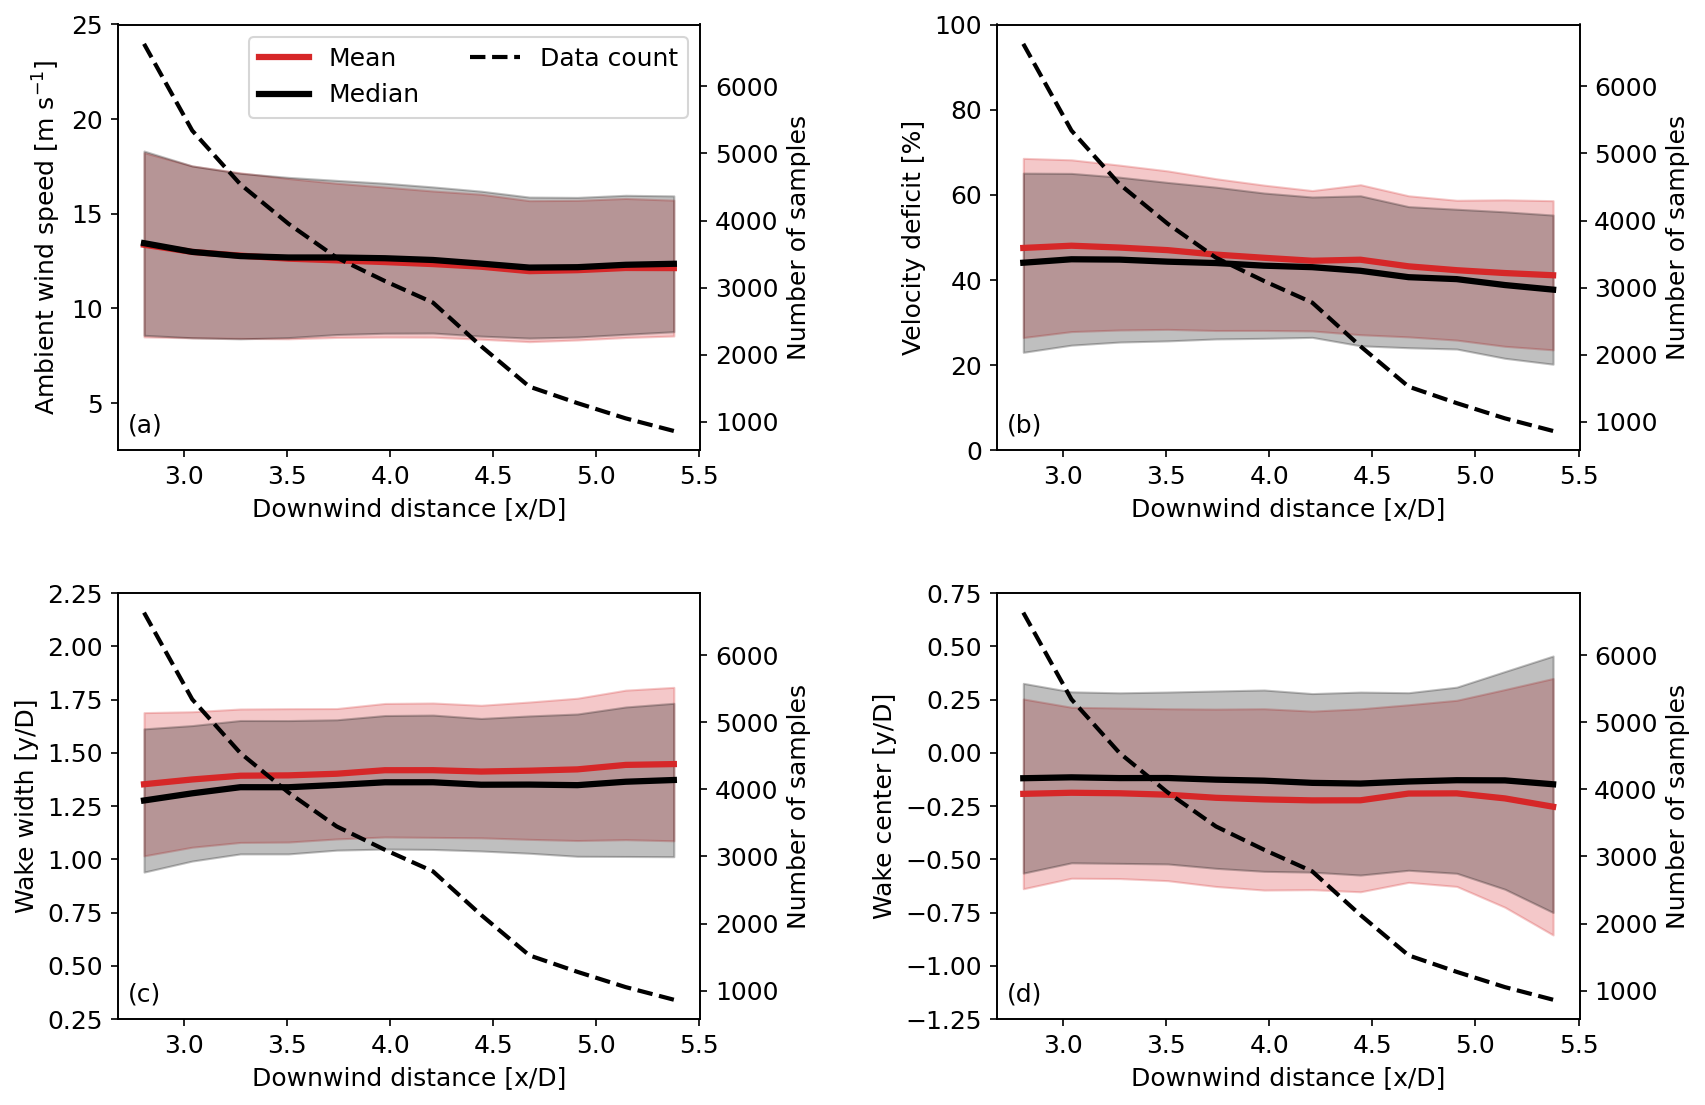

In [167]:
### Overall performance (mean / median)

fig=plt.figure(figsize=(12,8), dpi=150)

### Ambient wind speed

ax1=fig.add_subplot(221)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[Region_all].AWS.unstack().mean(), fmt='-', lw=3, color="C3", label="Mean")
ax1.fill_between(Rd[0:n], wake_Vr[Region_all].AWS.unstack().mean()-wake_Vr[Region_all].AWS.unstack().std(), wake_Vr[Region_all].AWS.unstack().mean()+wake_Vr[Region_all].AWS.unstack().std(), color='C3', alpha=0.25)
ax1.errorbar(Rd[0:n], wake_Vr[Region_all].AWS.unstack().median(), fmt='-', lw=3, color='black', label="Median")
ax1.fill_between(Rd[0:n], wake_Vr[Region_all].AWS.unstack().median()-wake_Vr[Region_all].AWS.unstack().std(), wake_Vr[Region_all].AWS.unstack().median()+wake_Vr[Region_all].AWS.unstack().std(), color='black', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[Region_all].AWS.unstack().count(), fmt='--', lw=2, color='black')
ax1.errorbar(Rd[0:n], label_sidechain, label='Data count', fmt='--', lw=2, color='black')
# ax1.set_title("Regions: 2, 2.5, 3",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Ambient wind speed [m s$^{-1}$]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.legend(loc='best',ncol=2,fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(2.5, 25)
ax1.text(0.018,0.042,'(a)',fontsize=12,transform=ax1.transAxes)


### Velocity deficit

ax1=fig.add_subplot(222)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[Region_all].WD.unstack().mean(), fmt='-', lw=3, color="C3", label="Mean")
ax1.fill_between(Rd[0:n], wake_Vr[Region_all].WD.unstack().mean()-wake_Vr[Region_all].WD.unstack().std(), wake_Vr[Region_all].WD.unstack().mean()+wake_Vr[Region_all].WD.unstack().std(), color='C3', alpha=0.25)
ax1.errorbar(Rd[0:n], wake_Vr[Region_all].WD.unstack().median(), fmt='-', lw=3, color='black', label="Median")
ax1.fill_between(Rd[0:n], wake_Vr[Region_all].WD.unstack().median()-wake_Vr[Region_all].WD.unstack().std(), wake_Vr[Region_all].WD.unstack().median()+wake_Vr[Region_all].WD.unstack().std(), color='black', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[Region_all].WD.unstack().count(), fmt='--', lw=2, color='black')
ax1.errorbar(Rd[0:n], label_sidechain, label='Data count', fmt='--', lw=2, color='black')
# ax1.set_title("Regions: 2, 2.5, 3",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Velocity deficit [%]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
# ax1.legend(loc='best',ncol=2,fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0, 100)
ax1.text(0.018,0.042,'(b)',fontsize=12,transform=ax1.transAxes)


### Wake width

ax1=fig.add_subplot(223)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[Region_all].WW.unstack().mean(), fmt='-', lw=3, color="C3", label="Mean")
ax1.fill_between(Rd[0:n], wake_Vr[Region_all].WW.unstack().mean()-wake_Vr[Region_all].WW.unstack().std(), wake_Vr[Region_all].WW.unstack().mean()+wake_Vr[Region_all].WW.unstack().std(), color='C3', alpha=0.25)
ax1.errorbar(Rd[0:n], wake_Vr[Region_all].WW.unstack().median(), fmt='-', lw=3, color='black', label="Median")
ax1.fill_between(Rd[0:n], wake_Vr[Region_all].WW.unstack().median()-wake_Vr[Region_all].WW.unstack().std(), wake_Vr[Region_all].WW.unstack().median()+wake_Vr[Region_all].WW.unstack().std(), color='black', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[Region_all].WW.unstack().count(), fmt='--', lw=2, color='black')
ax1.errorbar(Rd[0:n], label_sidechain, label='Data count', fmt='--', lw=2, color='black')
# ax1.set_title("Regions: 2, 2.5, 3",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake width [y/D]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
# ax1.legend(loc='best',ncol=2,fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0.25,2.25)
ax1.text(0.018,0.042,'(c)',fontsize=12,transform=ax1.transAxes)


### Wake center

ax1=fig.add_subplot(224)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[Region_all].CL.unstack().mean()/77, fmt='-', lw=3, color="C3", label="Mean")
ax1.fill_between(Rd[0:n], wake_Vr[Region_all].CL.unstack().mean()/77-wake_Vr[Region_all].CL.unstack().std()/77, wake_Vr[Region_all].CL.unstack().mean()/77+wake_Vr[Region_all].CL.unstack().std()/77, color='C3', alpha=0.25)
ax1.errorbar(Rd[0:n], wake_Vr[Region_all].CL.unstack().median()/77, fmt='-', lw=3, color='black', label="Median")
ax1.fill_between(Rd[0:n], wake_Vr[Region_all].CL.unstack().median()/77-wake_Vr[Region_all].CL.unstack().std()/77, wake_Vr[Region_all].CL.unstack().median()/77+wake_Vr[Region_all].CL.unstack().std()/77, color='black', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[Region_all].CL.unstack().count(), fmt='--', lw=2, color='black')
ax1.errorbar(Rd[0:n], label_sidechain, label='Data count', fmt='--', lw=2, color='black')
# ax1.set_title("Regions: 2, 2.5, 3",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake center [y/D]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
# ax1.legend(loc='best',ncol=2,fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(-1.25,0.75)
ax1.text(0.018,0.042,'(d)',fontsize=12,transform=ax1.transAxes)


fig.tight_layout(pad=3)

file_name = path + '/Figures_Final_V1/mean_median.pdf'
plt.savefig(file_name, bbox_inches='tight', format='pdf')

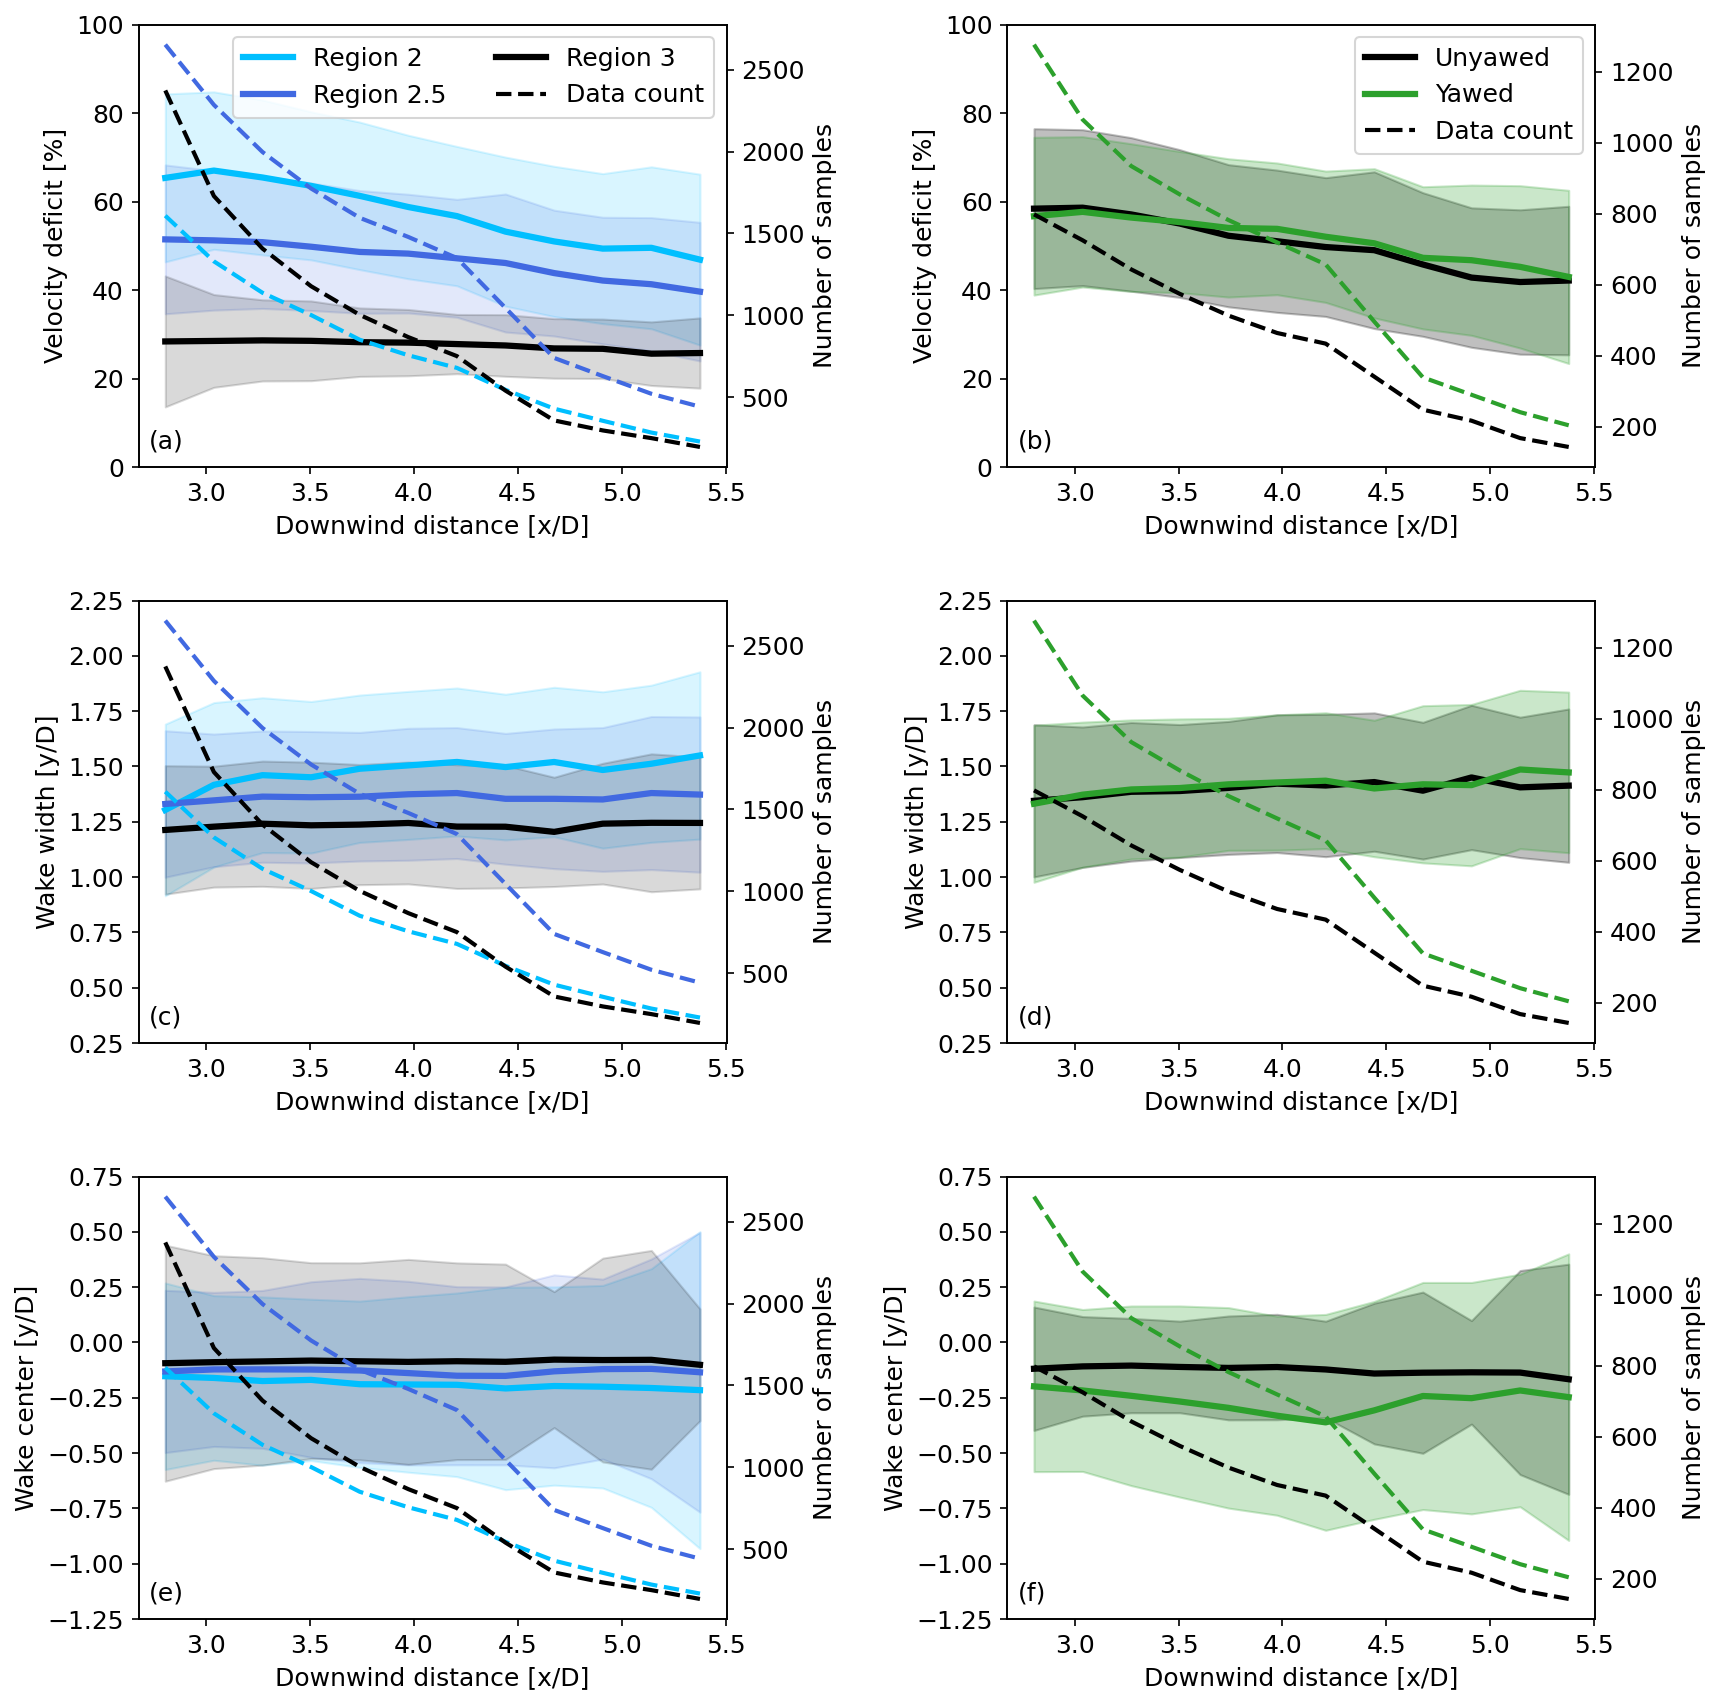

In [130]:
### Turbine operating condition

fig=plt.figure(figsize=(12,12), dpi=150)

### Velocity deficit

ax1=fig.add_subplot(321)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[Region2].WD.unstack().median(), lw=3, fmt='-', color="deepskyblue", label="Region 2")
ax1.fill_between(Rd[0:n], wake_Vr[Region2].WD.unstack().median()-wake_Vr[Region2].WD.unstack().std(), wake_Vr[Region2].WD.unstack().median()+wake_Vr[Region2].WD.unstack().std(), color='deepskyblue', alpha=0.15)
ax1.errorbar(Rd[0:n], wake_Vr[Region2p5].WD.unstack().median(), lw=3, fmt='-', color="royalblue", label="Region 2.5")
ax1.fill_between(Rd[0:n], wake_Vr[Region2p5].WD.unstack().median()-wake_Vr[Region2p5].WD.unstack().std(), wake_Vr[Region2p5].WD.unstack().median()+wake_Vr[Region2p5].WD.unstack().std(), color='royalblue', alpha=0.15)
ax1.errorbar(Rd[0:n], wake_Vr[Region3].WD.unstack().median(), lw=3, fmt='-', color="black", label="Region 3")
ax1.fill_between(Rd[0:n], wake_Vr[Region3].WD.unstack().median()-wake_Vr[Region3].WD.unstack().std(), wake_Vr[Region3].WD.unstack().median()+wake_Vr[Region3].WD.unstack().std(), color='black', alpha=0.15)
ax2.errorbar(Rd[0:n], wake_Vr[Region2].WD.unstack().count(), fmt='--', lw=2, color='deepskyblue', label="Region2")
ax2.errorbar(Rd[0:n], wake_Vr[Region2p5].WD.unstack().count(), fmt='--', lw=2, color='royalblue',  label="Region2.5")
ax2.errorbar(Rd[0:n], wake_Vr[Region3].WD.unstack().count(), fmt='--', lw=2, color='black',  label="Region3")
# ax1.errorbar(Rd[0:n], label_sidechain, label='Data points', fmt='--', lw=2, color='deepskyblue')
# ax1.errorbar(Rd[0:n], label_sidechain, label='Data points', fmt='--', lw=2, color='royalblue')
ax1.errorbar(Rd[0:n], label_sidechain, label='Data count', fmt='--', lw=2, color='black')
# ax1.set_title("Regions: 2, 2.5, 3",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Velocity deficit [%]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.legend(loc='best',ncol=2,fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0, 100)
ax1.text(0.018,0.042,'(a)',fontsize=12,transform=ax1.transAxes)

ax1=fig.add_subplot(322)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[unyawed&Region2+Region2p5].WD.unstack().median(), fmt='-', lw=3, color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], wake_Vr[unyawed&Region2+Region2p5].WD.unstack().median()-wake_Vr[unyawed&Region2+Region2p5].WD.unstack().std(), wake_Vr[unyawed&Region2+Region2p5].WD.unstack().median()+wake_Vr[unyawed&Region2+Region2p5].WD.unstack().std(), color='black', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[unyawed&Region2+Region2p5].WD.unstack().count(), fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], wake_Vr[yawed&Region2+Region2p5].WD.unstack().median(), fmt='-', lw=3, color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], wake_Vr[yawed&Region2+Region2p5].WD.unstack().median()-wake_Vr[yawed&Region2+Region2p5].WD.unstack().std(), wake_Vr[yawed&Region2+Region2p5].WD.unstack().median()+wake_Vr[yawed&Region2+Region2p5].WD.unstack().std(), color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[yawed&Region2+Region2p5].WD.unstack().count(), fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='black', label="Data count")
# ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='C2', label="Yawed data points")
ax1.legend(loc='best',ncol=1,fontsize=12)
# ax1.set_title("Regions: 2, 2.5",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Velocity deficit [%]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0, 100)
ax1.text(0.018,0.042,'(b)',fontsize=12,transform=ax1.transAxes)


### Wake width

ax1=fig.add_subplot(323)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[Region2].WW.unstack().median(), lw=3, fmt='-', color="deepskyblue", label="Region 2")
ax1.fill_between(Rd[0:n], wake_Vr[Region2].WW.unstack().median()-wake_Vr[Region2].WW.unstack().std(), wake_Vr[Region2].WW.unstack().median()+wake_Vr[Region2].WW.unstack().std(), color='deepskyblue', alpha=0.15)
ax1.errorbar(Rd[0:n], wake_Vr[Region2p5].WW.unstack().median(), lw=3, fmt='-', color="royalblue", label="Region 2.5")
ax1.fill_between(Rd[0:n], wake_Vr[Region2p5].WW.unstack().median()-wake_Vr[Region2p5].WW.unstack().std(), wake_Vr[Region2p5].WW.unstack().median()+wake_Vr[Region2p5].WW.unstack().std(), color='royalblue', alpha=0.15)
ax1.errorbar(Rd[0:n], wake_Vr[Region3].WW.unstack().median(), lw=3, fmt='-', color="black", label="Region 3")
ax1.fill_between(Rd[0:n], wake_Vr[Region3].WW.unstack().median()-wake_Vr[Region3].WW.unstack().std(), wake_Vr[Region3].WW.unstack().median()+wake_Vr[Region3].WW.unstack().std(), color='black', alpha=0.15)
ax2.errorbar(Rd[0:n], wake_Vr[Region2].WW.unstack().count(), fmt='--', lw=2, color='deepskyblue', label="Region2")
ax2.errorbar(Rd[0:n], wake_Vr[Region2p5].WW.unstack().count(), fmt='--', lw=2, color='royalblue',  label="Region2.5")
ax2.errorbar(Rd[0:n], wake_Vr[Region3].WW.unstack().count(), fmt='--', lw=2, color='black',  label="Region3")
# ax1.errorbar(Rd[0:n], label_sidechain, label='Data points', fmt='--', lw=2, color='deepskyblue')
# ax1.errorbar(Rd[0:n], label_sidechain, label='Data points', fmt='--', lw=2, color='royalblue')
ax1.errorbar(Rd[0:n], label_sidechain, label='Data count', fmt='--', lw=2, color='black')
# ax1.set_title("Regions: 2, 2.5, 3",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake width [y/D]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
# ax1.legend(loc='best',ncol=2,fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0.25,2.25)
ax1.text(0.018,0.042,'(c)',fontsize=12,transform=ax1.transAxes)

ax1=fig.add_subplot(324)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[unyawed&Region2+Region2p5].WW.unstack().median(), fmt='-', lw=3, color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], wake_Vr[unyawed&Region2+Region2p5].WW.unstack().median()-wake_Vr[unyawed&Region2+Region2p5].WW.unstack().std(), wake_Vr[unyawed&Region2+Region2p5].WW.unstack().median()+wake_Vr[unyawed&Region2+Region2p5].WW.unstack().std(), color='black', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[unyawed&Region2+Region2p5].WW.unstack().count(), fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], wake_Vr[yawed&Region2+Region2p5].WW.unstack().median(), fmt='-', lw=3, color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], wake_Vr[yawed&Region2+Region2p5].WW.unstack().median()-wake_Vr[yawed&Region2+Region2p5].WW.unstack().std(), wake_Vr[yawed&Region2+Region2p5].WW.unstack().median()+wake_Vr[yawed&Region2+Region2p5].WW.unstack().std(), color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[yawed&Region2+Region2p5].WW.unstack().count(), fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='black', label="Data count")
# ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='C2', label="Yawed data points")
# ax1.legend(loc='lower left',ncol=1,fontsize=12)
# ax1.set_title("Regions: 2, 2.5",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake width [y/D]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0.25,2.25)
ax1.text(0.018,0.042,'(d)',fontsize=12,transform=ax1.transAxes)


### Wake center

ax1=fig.add_subplot(325)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[Region2].CL.unstack().median()/77, lw=3, fmt='-', color="deepskyblue", label="Region 2")
ax1.fill_between(Rd[0:n], wake_Vr[Region2].CL.unstack().median()/77-wake_Vr[Region2].CL.unstack().std()/77, wake_Vr[Region2].CL.unstack().median()/77+wake_Vr[Region2].CL.unstack().std()/77, color='deepskyblue', alpha=0.15)
ax1.errorbar(Rd[0:n], wake_Vr[Region2p5].CL.unstack().median()/77, lw=3, fmt='-', color="royalblue", label="Region 2.5")
ax1.fill_between(Rd[0:n], wake_Vr[Region2p5].CL.unstack().median()/77-wake_Vr[Region2p5].CL.unstack().std()/77, wake_Vr[Region2p5].CL.unstack().median()/77+wake_Vr[Region2p5].CL.unstack().std()/77, color='royalblue', alpha=0.15)
ax1.errorbar(Rd[0:n], wake_Vr[Region3].CL.unstack().median()/77, lw=3, fmt='-', color="black", label="Region 3")
ax1.fill_between(Rd[0:n], wake_Vr[Region3].CL.unstack().median()/77-wake_Vr[Region3].CL.unstack().std()/77, wake_Vr[Region3].CL.unstack().median()/77+wake_Vr[Region3].CL.unstack().std()/77, color='black', alpha=0.15)
ax2.errorbar(Rd[0:n], wake_Vr[Region2].CL.unstack().count(), fmt='--', lw=2, color='deepskyblue', label="Region2")
ax2.errorbar(Rd[0:n], wake_Vr[Region2p5].CL.unstack().count(), fmt='--', lw=2, color='royalblue',  label="Region2.5")
ax2.errorbar(Rd[0:n], wake_Vr[Region3].CL.unstack().count(), fmt='--', lw=2, color='black',  label="Region3")
# ax1.errorbar(Rd[0:n], label_sidechain, label='Data points', fmt='--', lw=2, color='deepskyblue')
# ax1.errorbar(Rd[0:n], label_sidechain, label='Data points', fmt='--', lw=2, color='royalblue')
ax1.errorbar(Rd[0:n], label_sidechain, label='Data count', fmt='--', lw=2, color='black')
# ax1.set_title("Regions: 2, 2.5, 3",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake center [y/D]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
# ax1.legend(loc='best',ncol=2,fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(-1.25,0.75)
ax1.text(0.018,0.042,'(e)',fontsize=12,transform=ax1.transAxes)

ax1=fig.add_subplot(326)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[unyawed&Region2+Region2p5].CL.unstack().median()/77, fmt='-', lw=3, color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], wake_Vr[unyawed&Region2+Region2p5].CL.unstack().median()/77-wake_Vr[unyawed&Region2+Region2p5].CL.unstack().std()/77, wake_Vr[unyawed&Region2+Region2p5].CL.unstack().median()/77+wake_Vr[unyawed&Region2+Region2p5].CL.unstack().std()/77, color='black', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[unyawed&Region2+Region2p5].CL.unstack().count(), fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], wake_Vr[yawed&Region2+Region2p5].CL.unstack().median()/77, fmt='-', lw=3, color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], wake_Vr[yawed&Region2+Region2p5].CL.unstack().median()/77-wake_Vr[yawed&Region2+Region2p5].CL.unstack().std()/77, wake_Vr[yawed&Region2+Region2p5].CL.unstack().median()/77+wake_Vr[yawed&Region2+Region2p5].CL.unstack().std()/77, color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[yawed&Region2+Region2p5].CL.unstack().count(), fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='black', label="Data count")
# ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='C2', label="Yawed data points")
# ax1.legend(loc='lower left',ncol=1,fontsize=12)
# ax1.set_title("Regions: 2, 2.5",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake center [y/D]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(-1.25,0.75)
ax1.text(0.018,0.042,'(f)',fontsize=12,transform=ax1.transAxes)


fig.tight_layout(pad=3)

file_name = path + '/Figures_Final_V1/region_separation.pdf'
plt.savefig(file_name, bbox_inches='tight', format='pdf')

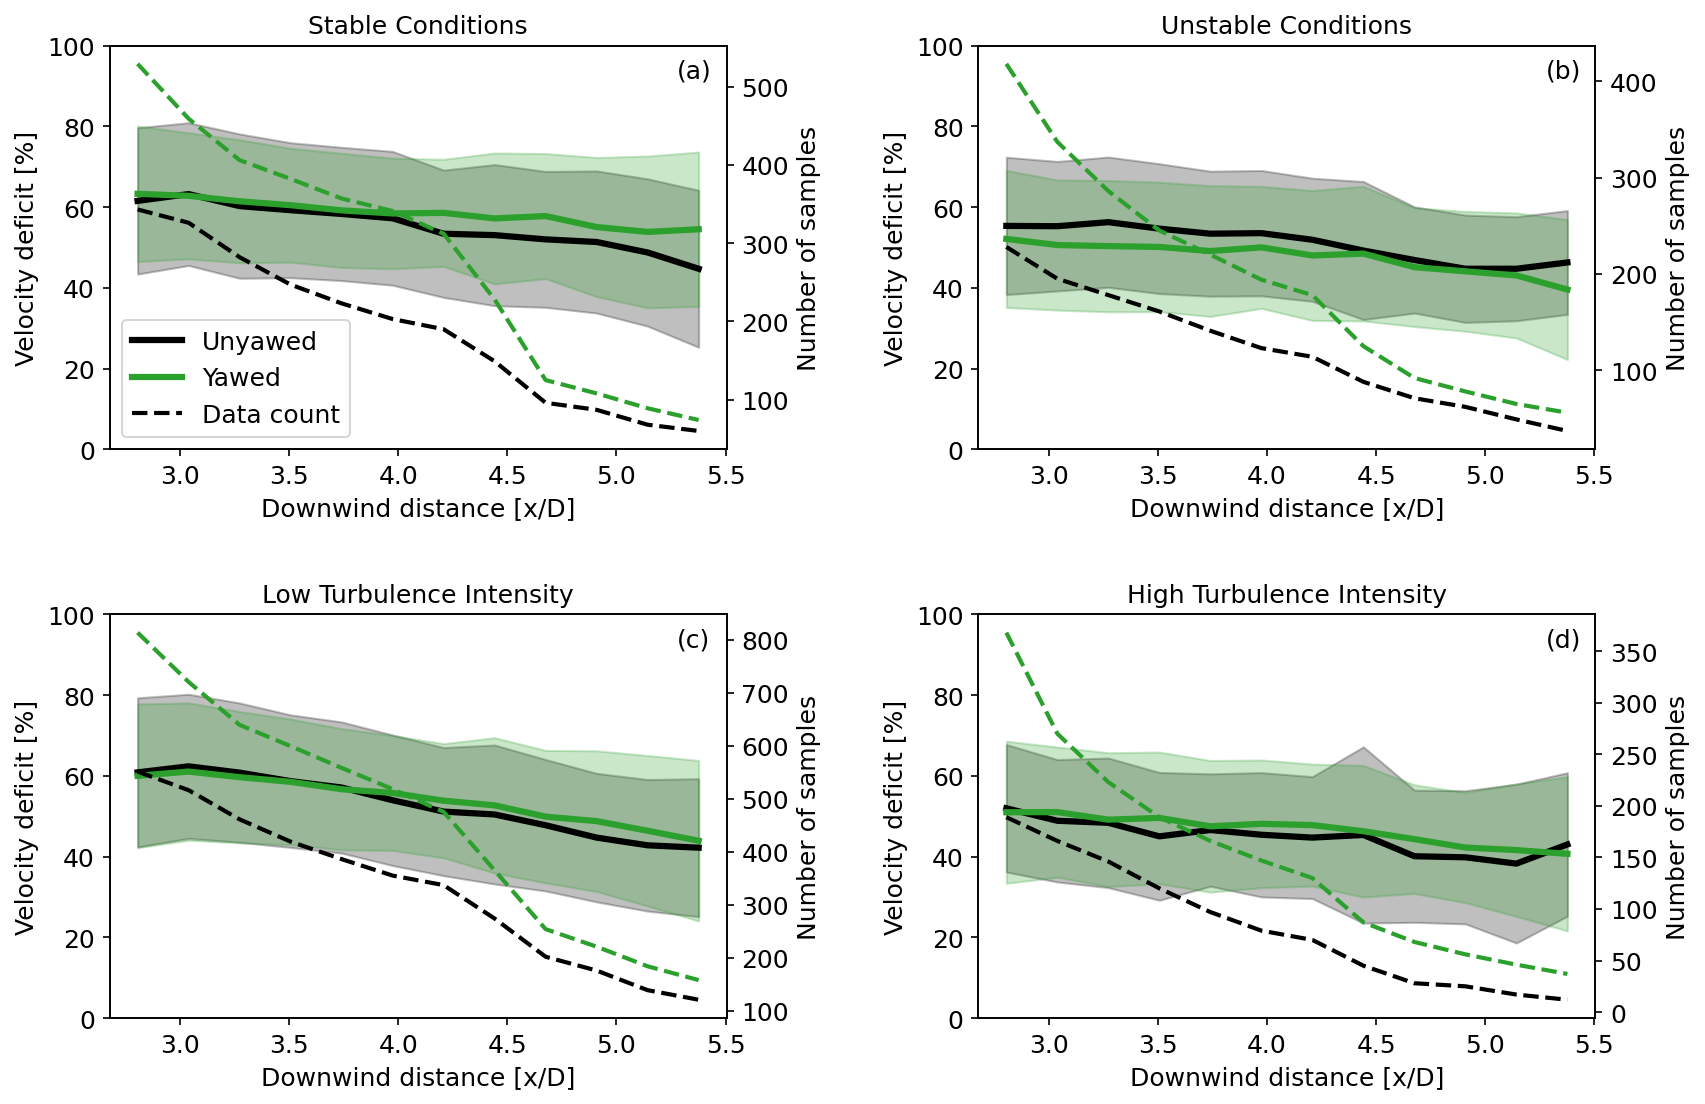

In [131]:
### Atmospheric stability - Velocity deficit

fig=plt.figure(figsize=(12,8), dpi=150)

ax1=fig.add_subplot(221)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[stable&unyawed&Region2+Region2p5].WD.unstack().median(), lw=3, fmt='-', color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], wake_Vr[stable&unyawed&Region2+Region2p5].WD.unstack().median()-wake_Vr[stable&unyawed&Region2+Region2p5].WD.unstack().std(), wake_Vr[stable&unyawed&Region2+Region2p5].WD.unstack().median()+wake_Vr[stable&unyawed&Region2+Region2p5].WD.unstack().std(), color="black", alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[stable&unyawed&Region2+Region2p5].WD.unstack().count(), fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], wake_Vr[stable&yawed&Region2+Region2p5].WD.unstack().median()[0:n],lw=3, fmt='-',color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], wake_Vr[stable&yawed&Region2+Region2p5].WD.unstack().median()[0:n]-wake_Vr[stable&yawed&Region2+Region2p5].WD.unstack().std()[0:n], wake_Vr[stable&yawed&Region2+Region2p5].WD.unstack().median()[0:n]+wake_Vr[stable&yawed&Region2+Region2p5].WD.unstack().std()[0:n], color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[stable&yawed&Region2+Region2p5].WD.unstack().count()[0:n], fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='black', label="Data count")
# ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='C2', label="Yawed data points")
ax1.set_title("Stable Conditions",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Velocity deficit [%]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.legend(loc='lower left',ncol=1,fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0, 100)
ax1.text(0.92,0.92, '(a)',fontsize=12, transform=ax1.transAxes)

ax1=fig.add_subplot(222)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[unstable&unyawed&Region2+Region2p5].WD.unstack().median()[0:n], lw=3, fmt='-', color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], wake_Vr[unstable&unyawed&Region2+Region2p5].WD.unstack().median()[0:n]-wake_Vr[unstable&unyawed&Region2+Region2p5].WD.unstack().std()[0:n], wake_Vr[unstable&unyawed&Region2+Region2p5].WD.unstack().median()[0:n]+wake_Vr[unstable&unyawed&Region2+Region2p5].WD.unstack().std()[0:n], color="black", alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[unstable&unyawed&Region2+Region2p5].WD.unstack().count(), fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], wake_Vr[unstable&yawed&Region2+Region2p5].WD.unstack().median()[0:n], lw=3, fmt='-',color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], wake_Vr[unstable&yawed&Region2+Region2p5].WD.unstack().median()[0:n]-wake_Vr[unstable&yawed&Region2+Region2p5].WD.unstack().std()[0:n], wake_Vr[unstable&yawed&Region2+Region2p5].WD.unstack().median()[0:n]+wake_Vr[unstable&yawed&Region2+Region2p5].WD.unstack().std()[0:n], color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[unstable&yawed&Region2+Region2p5].WD.unstack().count(), fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='black', label="Unyawed data points")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--',lw=2, color='C2', label="Yawed data points")
ax1.set_title("Unstable Conditions",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Velocity deficit [%]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0, 100)
ax1.text(0.92,0.92, '(b)',fontsize=12, transform=ax1.transAxes)

ax1=fig.add_subplot(223)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[lowTI&unyawed&Region2+Region2p5].WD.unstack().median()[0:n], fmt='-', lw=3, color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], wake_Vr[lowTI&unyawed&Region2+Region2p5].WD.unstack().median()[0:n]-wake_Vr[lowTI&unyawed&Region2+Region2p5].WD.unstack().std()[0:n], wake_Vr[lowTI&unyawed&Region2+Region2p5].WD.unstack().median()[0:n]+wake_Vr[lowTI&unyawed&Region2+Region2p5].WD.unstack().std()[0:n], color='black', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[lowTI&unyawed&Region2+Region2p5].WD.unstack().count()[0:n], fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], wake_Vr[lowTI&yawed&Region2+Region2p5].WD.unstack().median()[0:n], fmt='-', lw=3, color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], wake_Vr[lowTI&yawed&Region2+Region2p5].WD.unstack().median()[0:n]-wake_Vr[lowTI&yawed&Region2+Region2p5].WD.unstack().std()[0:n], wake_Vr[lowTI&yawed&Region2+Region2p5].WD.unstack().median()[0:n]+wake_Vr[lowTI&yawed&Region2+Region2p5].WD.unstack().std()[0:n], color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[lowTI&yawed&Region2+Region2p5].WD.unstack().count()[0:n], fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--',color='black', label="Unyawed data points")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--',color='C2', label="Yawed data points")
ax1.set_title("Low Turbulence Intensity",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Velocity deficit [%]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0, 100)
ax1.text(0.92,0.92, '(c)',fontsize=12, transform=ax1.transAxes)

ax1=fig.add_subplot(224)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[highTI&unyawed&Region2+Region2p5].WD.unstack().median()[0:n], fmt='-', lw=3, color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], wake_Vr[highTI&unyawed&Region2+Region2p5].WD.unstack().median()[0:n]-wake_Vr[highTI&unyawed&Region2+Region2p5].WD.unstack().std()[0:n], wake_Vr[highTI&unyawed&Region2+Region2p5].WD.unstack().median()[0:n]+wake_Vr[highTI&unyawed&Region2+Region2p5].WD.unstack().std()[0:n], color='black', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[highTI&unyawed&Region2+Region2p5].WD.unstack().count()[0:n], fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], wake_Vr[highTI&yawed&Region2+Region2p5].WD.unstack().median()[0:n], fmt='-', lw=3, color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], wake_Vr[highTI&yawed&Region2+Region2p5].WD.unstack().median()[0:n]-wake_Vr[highTI&yawed&Region2+Region2p5].WD.unstack().std()[0:n], wake_Vr[highTI&yawed&Region2+Region2p5].WD.unstack().median()[0:n]+wake_Vr[highTI&yawed&Region2+Region2p5].WD.unstack().std()[0:n], color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[highTI&yawed&Region2+Region2p5].WD.unstack().count()[0:n], fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--',color='black', label="Unyawed data points")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--',color='C2', label="Yawed data points")
ax1.set_title("High Turbulence Intensity",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Velocity deficit [%]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0, 100)
ax1.text(0.92,0.92, '(d)',fontsize=12, transform=ax1.transAxes)

fig.tight_layout(pad=3)

file_name = path + '/Figures_Final_V1/yawed_unyawed_conditions_WD.pdf'
plt.savefig(file_name, bbox_inches='tight', format='pdf')

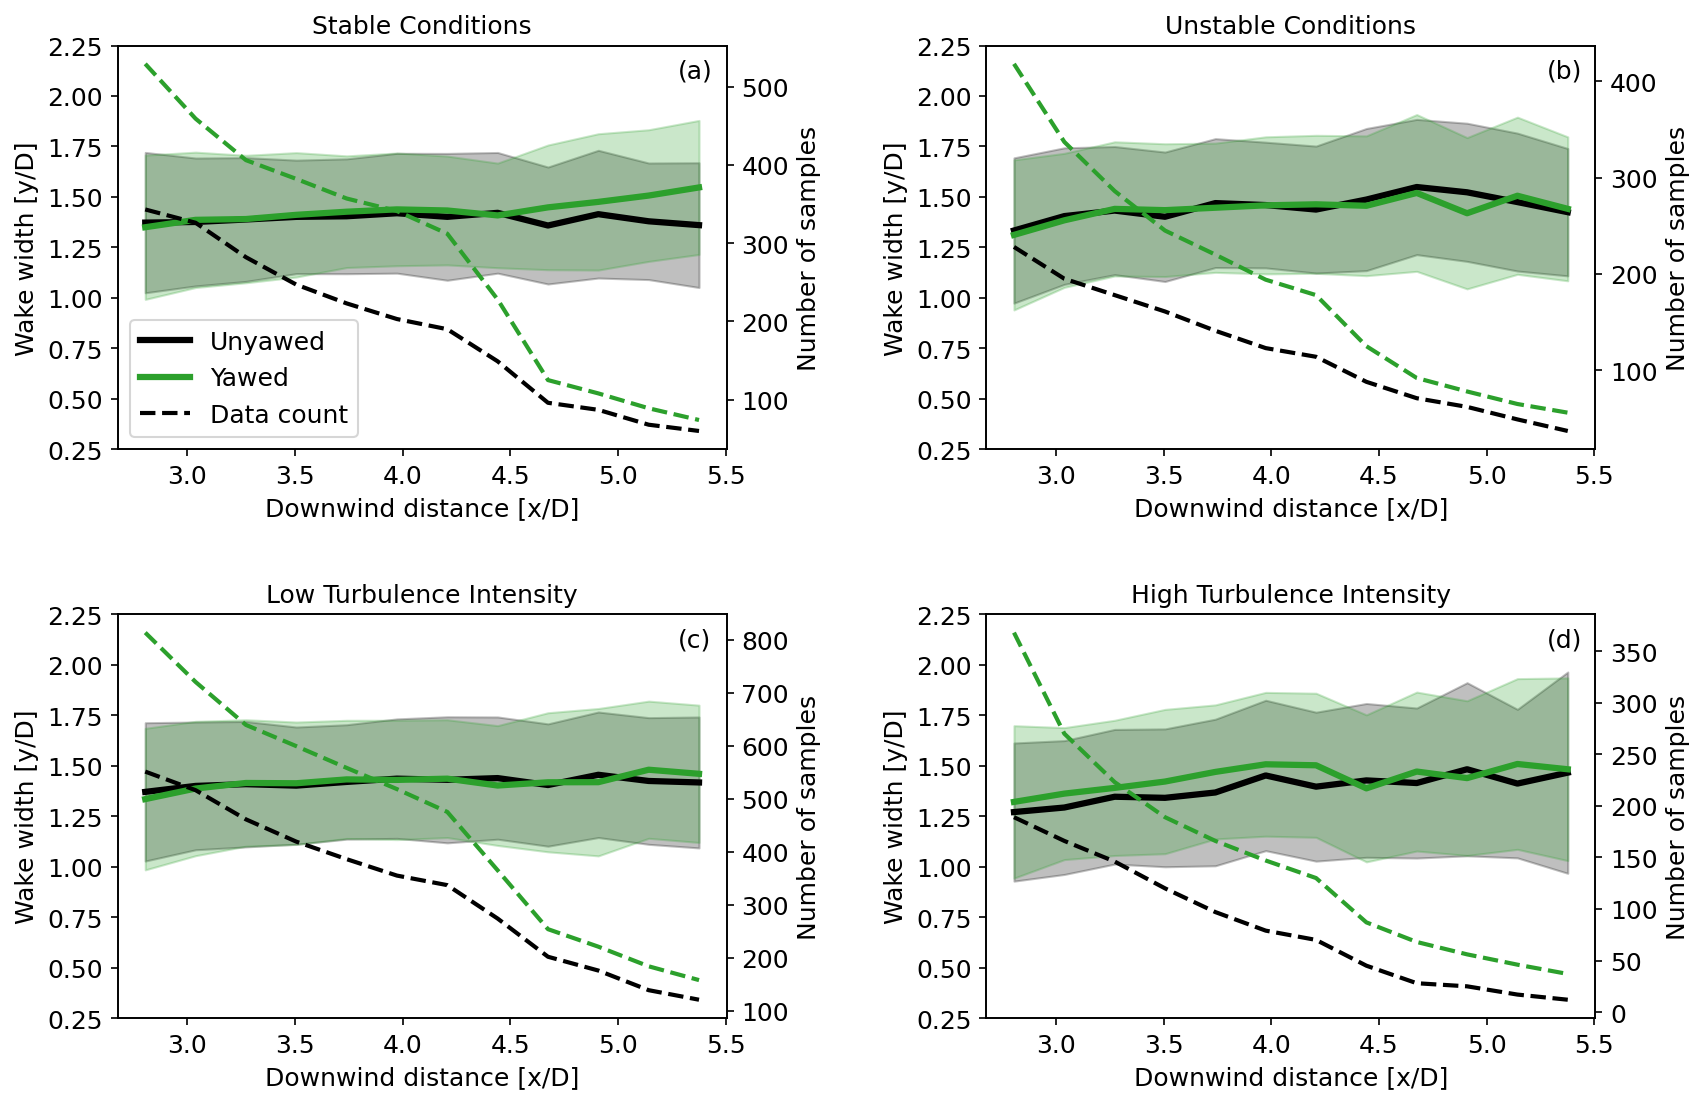

In [139]:
### Atmospheric stability - Wake width

fig=plt.figure(figsize=(12,8), dpi=150)

ax1=fig.add_subplot(221)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[stable&unyawed&Region2+Region2p5].WW.unstack().median(), lw=3, fmt='-', color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], wake_Vr[stable&unyawed&Region2+Region2p5].WW.unstack().median()-wake_Vr[stable&unyawed&Region2+Region2p5].WW.unstack().std(), wake_Vr[stable&unyawed&Region2+Region2p5].WW.unstack().median()+wake_Vr[stable&unyawed&Region2+Region2p5].WW.unstack().std(), color="black", alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[stable&unyawed&Region2+Region2p5].WW.unstack().count(), fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], wake_Vr[stable&yawed&Region2+Region2p5].WW.unstack().median()[0:n],lw=3, fmt='-',color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], wake_Vr[stable&yawed&Region2+Region2p5].WW.unstack().median()[0:n]-wake_Vr[stable&yawed&Region2+Region2p5].WW.unstack().std()[0:n], wake_Vr[stable&yawed&Region2+Region2p5].WW.unstack().median()[0:n]+wake_Vr[stable&yawed&Region2+Region2p5].WW.unstack().std()[0:n], color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[stable&yawed&Region2+Region2p5].WW.unstack().count()[0:n], fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='black', label="Data count")
# ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='C2', label="Yawed data points")
ax1.set_title("Stable Conditions",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake width [y/D]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.legend(loc='lower left',ncol=1,fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0.25,2.25)
ax1.text(0.92,0.92, '(a)',fontsize=12, transform=ax1.transAxes)

ax1=fig.add_subplot(222)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[unstable&unyawed&Region2+Region2p5].WW.unstack().median()[0:n], lw=3, fmt='-', color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], wake_Vr[unstable&unyawed&Region2+Region2p5].WW.unstack().median()[0:n]-wake_Vr[unstable&unyawed&Region2+Region2p5].WW.unstack().std()[0:n], wake_Vr[unstable&unyawed&Region2+Region2p5].WW.unstack().median()[0:n]+wake_Vr[unstable&unyawed&Region2+Region2p5].WW.unstack().std()[0:n], color="black", alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[unstable&unyawed&Region2+Region2p5].WW.unstack().count(), fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], wake_Vr[unstable&yawed&Region2+Region2p5].WW.unstack().median()[0:n], lw=3, fmt='-',color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], wake_Vr[unstable&yawed&Region2+Region2p5].WW.unstack().median()[0:n]-wake_Vr[unstable&yawed&Region2+Region2p5].WW.unstack().std()[0:n], wake_Vr[unstable&yawed&Region2+Region2p5].WW.unstack().median()[0:n]+wake_Vr[unstable&yawed&Region2+Region2p5].WW.unstack().std()[0:n], color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[unstable&yawed&Region2+Region2p5].WW.unstack().count(), fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='black', label="Unyawed data points")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--',lw=2, color='C2', label="Yawed data points")
ax1.set_title("Unstable Conditions",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake width [y/D]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0.25,2.25)
ax1.text(0.92,0.92, '(b)',fontsize=12, transform=ax1.transAxes)

ax1=fig.add_subplot(223)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[lowTI&unyawed&Region2+Region2p5].WW.unstack().median()[0:n], fmt='-', lw=3, color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], wake_Vr[lowTI&unyawed&Region2+Region2p5].WW.unstack().median()[0:n]-wake_Vr[lowTI&unyawed&Region2+Region2p5].WW.unstack().std()[0:n], wake_Vr[lowTI&unyawed&Region2+Region2p5].WW.unstack().median()[0:n]+wake_Vr[lowTI&unyawed&Region2+Region2p5].WW.unstack().std()[0:n], color='black', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[lowTI&unyawed&Region2+Region2p5].WW.unstack().count()[0:n], fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], wake_Vr[lowTI&yawed&Region2+Region2p5].WW.unstack().median()[0:n], fmt='-', lw=3, color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], wake_Vr[lowTI&yawed&Region2+Region2p5].WW.unstack().median()[0:n]-wake_Vr[lowTI&yawed&Region2+Region2p5].WW.unstack().std()[0:n], wake_Vr[lowTI&yawed&Region2+Region2p5].WW.unstack().median()[0:n]+wake_Vr[lowTI&yawed&Region2+Region2p5].WW.unstack().std()[0:n], color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[lowTI&yawed&Region2+Region2p5].WW.unstack().count()[0:n], fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--',color='black', label="Unyawed data points")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--',color='C2', label="Yawed data points")
ax1.set_title("Low Turbulence Intensity",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake width [y/D]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0.25,2.25)
ax1.text(0.92,0.92, '(c)',fontsize=12, transform=ax1.transAxes)

ax1=fig.add_subplot(224)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[highTI&unyawed&Region2+Region2p5].WW.unstack().median()[0:n], fmt='-', lw=3, color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], wake_Vr[highTI&unyawed&Region2+Region2p5].WW.unstack().median()[0:n]-wake_Vr[highTI&unyawed&Region2+Region2p5].WW.unstack().std()[0:n], wake_Vr[highTI&unyawed&Region2+Region2p5].WW.unstack().median()[0:n]+wake_Vr[highTI&unyawed&Region2+Region2p5].WW.unstack().std()[0:n], color='black', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[highTI&unyawed&Region2+Region2p5].WW.unstack().count()[0:n], fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], wake_Vr[highTI&yawed&Region2+Region2p5].WW.unstack().median()[0:n], fmt='-', lw=3, color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], wake_Vr[highTI&yawed&Region2+Region2p5].WW.unstack().median()[0:n]-wake_Vr[highTI&yawed&Region2+Region2p5].WW.unstack().std()[0:n], wake_Vr[highTI&yawed&Region2+Region2p5].WW.unstack().median()[0:n]+wake_Vr[highTI&yawed&Region2+Region2p5].WW.unstack().std()[0:n], color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[highTI&yawed&Region2+Region2p5].WW.unstack().count()[0:n], fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--',color='black', label="Unyawed data points")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--',color='C2', label="Yawed data points")
ax1.set_title("High Turbulence Intensity",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake width [y/D]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(0.25,2.25)
ax1.text(0.92,0.92, '(d)',fontsize=12, transform=ax1.transAxes)

fig.tight_layout(pad=3)

file_name = path + '/Figures_Final_V1/yawed_unyawed_conditions_WW.pdf'
plt.savefig(file_name, bbox_inches='tight', format='pdf')

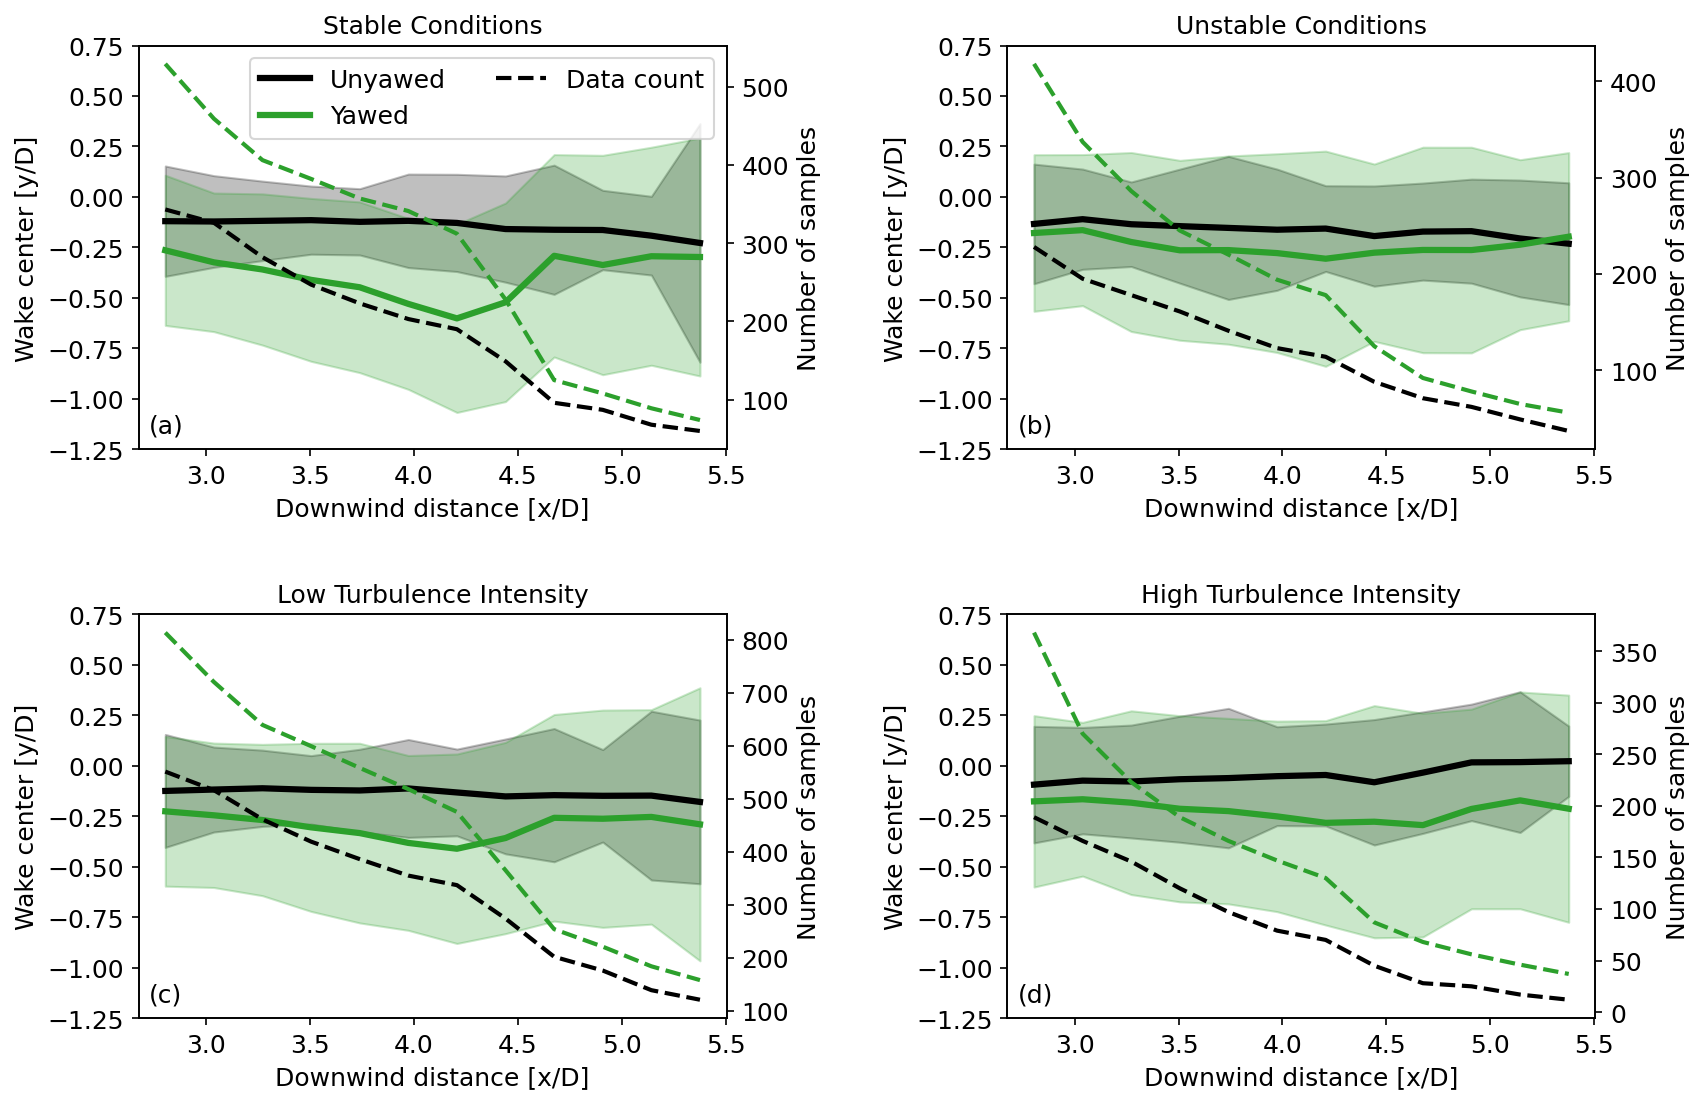

In [137]:
### Atmospheric stability - Wake center

fig=plt.figure(figsize=(12,8), dpi=150)

ax1=fig.add_subplot(221)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[stable&unyawed&Region2+Region2p5].CL.unstack().median()/77, lw=3, fmt='-', color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], wake_Vr[stable&unyawed&Region2+Region2p5].CL.unstack().median()/77-wake_Vr[stable&unyawed&Region2+Region2p5].CL.unstack().std()/77, wake_Vr[stable&unyawed&Region2+Region2p5].CL.unstack().median()/77+wake_Vr[stable&unyawed&Region2+Region2p5].CL.unstack().std()/77, color="black", alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[stable&unyawed&Region2+Region2p5].CL.unstack().count(), fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], wake_Vr[stable&yawed&Region2+Region2p5].CL.unstack().median()[0:n]/77,lw=3, fmt='-',color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], wake_Vr[stable&yawed&Region2+Region2p5].CL.unstack().median()[0:n]/77-wake_Vr[stable&yawed&Region2+Region2p5].CL.unstack().std()[0:n]/77, wake_Vr[stable&yawed&Region2+Region2p5].CL.unstack().median()[0:n]/77+wake_Vr[stable&yawed&Region2+Region2p5].CL.unstack().std()[0:n]/77, color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[stable&yawed&Region2+Region2p5].CL.unstack().count()[0:n], fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='black', label="Data count")
# ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='C2', label="Yawed data points")
ax1.set_title("Stable Conditions",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake center [y/D]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.legend(loc='best',ncol=2,fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(-1.25,0.75)
ax1.text(0.018,0.042, '(a)',fontsize=12, transform=ax1.transAxes)

ax1=fig.add_subplot(222)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[unstable&unyawed&Region2+Region2p5].CL.unstack().median()[0:n]/77, lw=3, fmt='-', color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], wake_Vr[unstable&unyawed&Region2+Region2p5].CL.unstack().median()[0:n]/77-wake_Vr[unstable&unyawed&Region2+Region2p5].CL.unstack().std()[0:n]/77, wake_Vr[unstable&unyawed&Region2+Region2p5].CL.unstack().median()[0:n]/77+wake_Vr[unstable&unyawed&Region2+Region2p5].CL.unstack().std()[0:n]/77, color="black", alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[unstable&unyawed&Region2+Region2p5].CL.unstack().count(), fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], wake_Vr[unstable&yawed&Region2+Region2p5].CL.unstack().median()[0:n]/77, lw=3, fmt='-',color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], wake_Vr[unstable&yawed&Region2+Region2p5].CL.unstack().median()[0:n]/77-wake_Vr[unstable&yawed&Region2+Region2p5].CL.unstack().std()[0:n]/77, wake_Vr[unstable&yawed&Region2+Region2p5].CL.unstack().median()[0:n]/77+wake_Vr[unstable&yawed&Region2+Region2p5].CL.unstack().std()[0:n]/77, color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[unstable&yawed&Region2+Region2p5].CL.unstack().count(), fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--', lw=2, color='black', label="Unyawed data points")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--',lw=2, color='C2', label="Yawed data points")
ax1.set_title("Unstable Conditions",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake center [y/D]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(-1.25,0.75)
ax1.text(0.018,0.042, '(b)',fontsize=12, transform=ax1.transAxes)

ax1=fig.add_subplot(223)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[lowTI&unyawed&Region2+Region2p5].CL.unstack().median()[0:n]/77, fmt='-', lw=3, color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], wake_Vr[lowTI&unyawed&Region2+Region2p5].CL.unstack().median()[0:n]/77-wake_Vr[lowTI&unyawed&Region2+Region2p5].CL.unstack().std()[0:n]/77, wake_Vr[lowTI&unyawed&Region2+Region2p5].CL.unstack().median()[0:n]/77+wake_Vr[lowTI&unyawed&Region2+Region2p5].CL.unstack().std()[0:n]/77, color='black', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[lowTI&unyawed&Region2+Region2p5].CL.unstack().count()[0:n], fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], wake_Vr[lowTI&yawed&Region2+Region2p5].CL.unstack().median()[0:n]/77, fmt='-', lw=3, color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], wake_Vr[lowTI&yawed&Region2+Region2p5].CL.unstack().median()[0:n]/77-wake_Vr[lowTI&yawed&Region2+Region2p5].CL.unstack().std()[0:n]/77, wake_Vr[lowTI&yawed&Region2+Region2p5].CL.unstack().median()[0:n]/77+wake_Vr[lowTI&yawed&Region2+Region2p5].CL.unstack().std()[0:n]/77, color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[lowTI&yawed&Region2+Region2p5].CL.unstack().count()[0:n], fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--',color='black', label="Unyawed data points")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--',color='C2', label="Yawed data points")
ax1.set_title("Low Turbulence Intensity",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake center [y/D]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(-1.25,0.75)
ax1.text(0.018,0.042, '(c)',fontsize=12, transform=ax1.transAxes)

ax1=fig.add_subplot(224)
ax2=ax1.twinx()
ax1.errorbar(Rd[0:n], wake_Vr[highTI&unyawed&Region2+Region2p5].CL.unstack().median()[0:n]/77, fmt='-', lw=3, color='black', label="Unyawed")
ax1.fill_between(Rd[0:n], wake_Vr[highTI&unyawed&Region2+Region2p5].CL.unstack().median()[0:n]/77-wake_Vr[highTI&unyawed&Region2+Region2p5].CL.unstack().std()[0:n]/77, wake_Vr[highTI&unyawed&Region2+Region2p5].CL.unstack().median()[0:n]/77+wake_Vr[highTI&unyawed&Region2+Region2p5].CL.unstack().std()[0:n]/77, color='black', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[highTI&unyawed&Region2+Region2p5].CL.unstack().count()[0:n], fmt='--', lw=2, color='black', label="Unyawed")
ax1.errorbar(Rd[0:n], wake_Vr[highTI&yawed&Region2+Region2p5].CL.unstack().median()[0:n]/77, fmt='-', lw=3, color='C2', label="Yawed")
ax1.fill_between(Rd[0:n], wake_Vr[highTI&yawed&Region2+Region2p5].CL.unstack().median()[0:n]/77-wake_Vr[highTI&yawed&Region2+Region2p5].CL.unstack().std()[0:n]/77, wake_Vr[highTI&yawed&Region2+Region2p5].CL.unstack().median()[0:n]/77+wake_Vr[highTI&yawed&Region2+Region2p5].CL.unstack().std()[0:n]/77, color='C2', alpha=0.25)
ax2.errorbar(Rd[0:n], wake_Vr[highTI&yawed&Region2+Region2p5].CL.unstack().count()[0:n], fmt='--', lw=2, color='C2', label="Yawed")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--',color='black', label="Unyawed data points")
ax1.errorbar(Rd[0:n], label_sidechain, fmt='--',color='C2', label="Yawed data points")
ax1.set_title("High Turbulence Intensity",fontsize=12)
ax1.set_xlabel("Downwind distance [x/D]",fontsize=12)
ax1.set_ylabel('Wake center [y/D]',fontsize=12)
ax2.set_ylabel('Number of samples',fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_ylim(-1.25,0.75)
ax1.text(0.018,0.042, '(d)',fontsize=12, transform=ax1.transAxes)

fig.tight_layout(pad=3)

file_name = path + '/Figures_Final_V1/yawed_unyawed_conditions_CL.pdf'
plt.savefig(file_name, bbox_inches='tight', format='pdf')